# TMP exploration

```python
import torch
all_scores = torch.load('tmp_scores.pt', map_location=torch.device('cpu'))

```python
len(all_scores[0])

```python
scores = all_scores[0]

```python
scores.shape

```python
import matplotlib.pyplot as plt
import numpy as np

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(scores[1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(scores.reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
import torch
all_E = torch.load('tmp_E.pt', map_location=torch.device('cpu'))

```python
E, E_v = all_E[0]

```python
E.shape

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(E.reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

---
---
---

# Visualize experiments results

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
#import seaborn as sns

/scratch2/clear/ejehanno/miniconda3/envs/graphgps_/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


You can chose to study a run among these:

!ls /scratch2/clear/ejehanno/models_weights/

By relaunching
```bash
python main.py --cfg /scratch2/clear/ejehanno/models_weights/zinc-GraphiT_EJ_Q+K+E_multi_V+E_multi_noHeads_DoubleScaling-Q+K+E_multi_V+E_multi_DptConn_noHeads_DoubleScaling_4seeds/\(Q+K+E_multi\)\*\(V+E_multi\)_DptConn_noHeads_DoubleScaling_4seeds/config.yaml train.auto_resume True
```
Or Whatever

In [2]:
def extractor(xp_name):
    # '(QK+E)*(V+E)_multi_DptHead' # cfg.wandb.name
    main_path = '/scratch2/clear/ejehanno/extracted/'
    extracted_path = os.path.join(main_path, xp_name)
    all_scores = torch.load(os.path.join(extracted_path, 'scores.pt'),
                            map_location=torch.device('cpu'))
    all_E = torch.load(os.path.join(extracted_path, 'Ea.pt'),
                            map_location=torch.device('cpu'))
    all_Ev = torch.load(os.path.join(extracted_path, 'Ev.pt'),
                            map_location=torch.device('cpu'))
    batch = torch.load(os.path.join(extracted_path, 'batch.pt'),
                            map_location=torch.device('cpu'))
    return all_scores, all_E, all_Ev, batch

``` python
all_scores, all_E, all_Ev, batch = extractor('(Q+K+E_multi)*(V+E_multi)_DptConn_noHeads_DoubleScaling_4seeds')

## Exploration of the techniques

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][0,:16,:16,0,idx].numpy())
    plt.colorbar()
    plt.axis('off')
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
import matplotlib.cm as cm
from matplotlib.colors import Normalize
fig, axes = plt.subplots(nrows=4, ncols=4)
cmap=cm.get_cmap('viridis')
normalizer=Normalize(all_scores[0][0,:16,:16,0,:].min(),all_scores[0][0,:16,:16,0,:].max())
im=cm.ScalarMappable(norm=normalizer)
for idx, ax in enumerate(axes.flat):
    im = ax.imshow(all_scores[0][0,:16,:16,0,idx].numpy(),cmap=cmap,norm=normalizer)
    #plt.colorbar()
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_E[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_Ev[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy()
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), 
                             repeats=loc_scores.shape[-1], axis=1)
    ax = main.add_subplot(4,1,idx+1)
    ax.imshow(loc_scores, alpha=transparency*.1)
    im = tmp.imshow(loc_scores, alpha=1.0)
    main.colorbar(im, ax=ax)
plt.close(tampon)
main.show()

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(all_E[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(all_Ev[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

## Now we dive into the details for interesting ones

``` python
all_scores, all_E, all_Ev, batch = extractor(
    '(Q+K+E_multi)*(V+E_multi)_DptConn_noHeads_DoubleScaling_4seeds'
)

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), repeats=loc_scores.shape[-1], axis=1)
    plt.subplot(4,1,idx+1)
    try:
        plt.imshow(loc_scores[1,idx,:23,:].numpy(), alpha=transparency*.1)
    except:
        print(idx)
    #plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

## Publishable version

``` python
from torch_geometric.utils import to_dense_batch

``` python
# h_dense, mask = to_dense_batch(batch.x, batch.batch)
# mask = mask.unsqueeze(-1) * mask.unsqueeze(1)
# print(all_scores[0][batch_idx].shape)
# all_scores[0][batch_idx][mask[batch_idx]].shape#.reshape(32,31,31,1,-1)\
batch_idx = 4
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)
loc_scores = all_scores[0][batch_idx][mask]
num_nodes = int(np.sqrt(loc_scores.shape[0]))
loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:])).shape

``` python
batch_idx = 6 # 6
head_idx = 0
#channel_slice = range(nb_channels)
channel_slice = range(26,30)
# channel_slice = range(44,48)
# channel_slice = range(53,57)
# channel_slice = range(57,61)
nb_channels = len(channel_slice)
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)
plt.figure(figsize=(12,12*int(nb_channels/4)))
for rk, layer_idx in enumerate([0,4,9]):
    for channel_idx in channel_slice:
        loc_scores = all_scores[layer_idx][batch_idx][mask]
        num_nodes = int(np.sqrt(loc_scores.shape[0]))
        loc_scores = loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:]))
        plt.subplot(nb_channels,3,channel_idx*3 + rk + 1)
        plt.imshow(loc_scores[:,:,head_idx,channel_idx].numpy())
        #plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        if rk==0:
            plt.ylabel(f'Channel {channel_idx + 1}', fontsize=14)
        if channel_idx==0:
            plt.title(f'Layer {layer_idx+1}', fontsize=14)
plt.subplots_adjust(wspace=-.5, hspace=.1)
plt.show()

```python
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
node_idx = 4
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_scores[layer_idx].reshape(32, 31, 31, -1)[1,node_idx,:23,:].numpy()
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==node_idx][1].numpy()
    transparency = np.ones(23) * 4 # 6
    transparency[neighbors] += 4 # 8
    transparency = np.repeat(transparency.reshape(-1,1), 
                             repeats=loc_scores.shape[-1], axis=1)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores, alpha=transparency*.1)
    im = tmp.imshow(loc_scores, alpha=1.0)
    main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

---
---
---
With only a few channels:

In [3]:
from torch_geometric.utils import to_dense_batch

/scratch2/clear/ejehanno/miniconda3/envs/graphgps_/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
#all_scores, all_E, all_Ev, batch = extractor('(QK+E)*(V+E)_DptConn_VerySmall_vf')
all_scores, all_E, all_Ev, batch = extractor('(QK+E)*(V+E)_DptConn_Shared')
#all_scores, all_E, all_Ev, batch = extractor('(QK+E)*(V+E)_DptConn_Shared_rwse')

In [5]:
batch_idx = 6 # 6
head_idx = 0
node_idx = 4
batch_node_idx = batch.ptr[batch_idx] + node_idx
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)

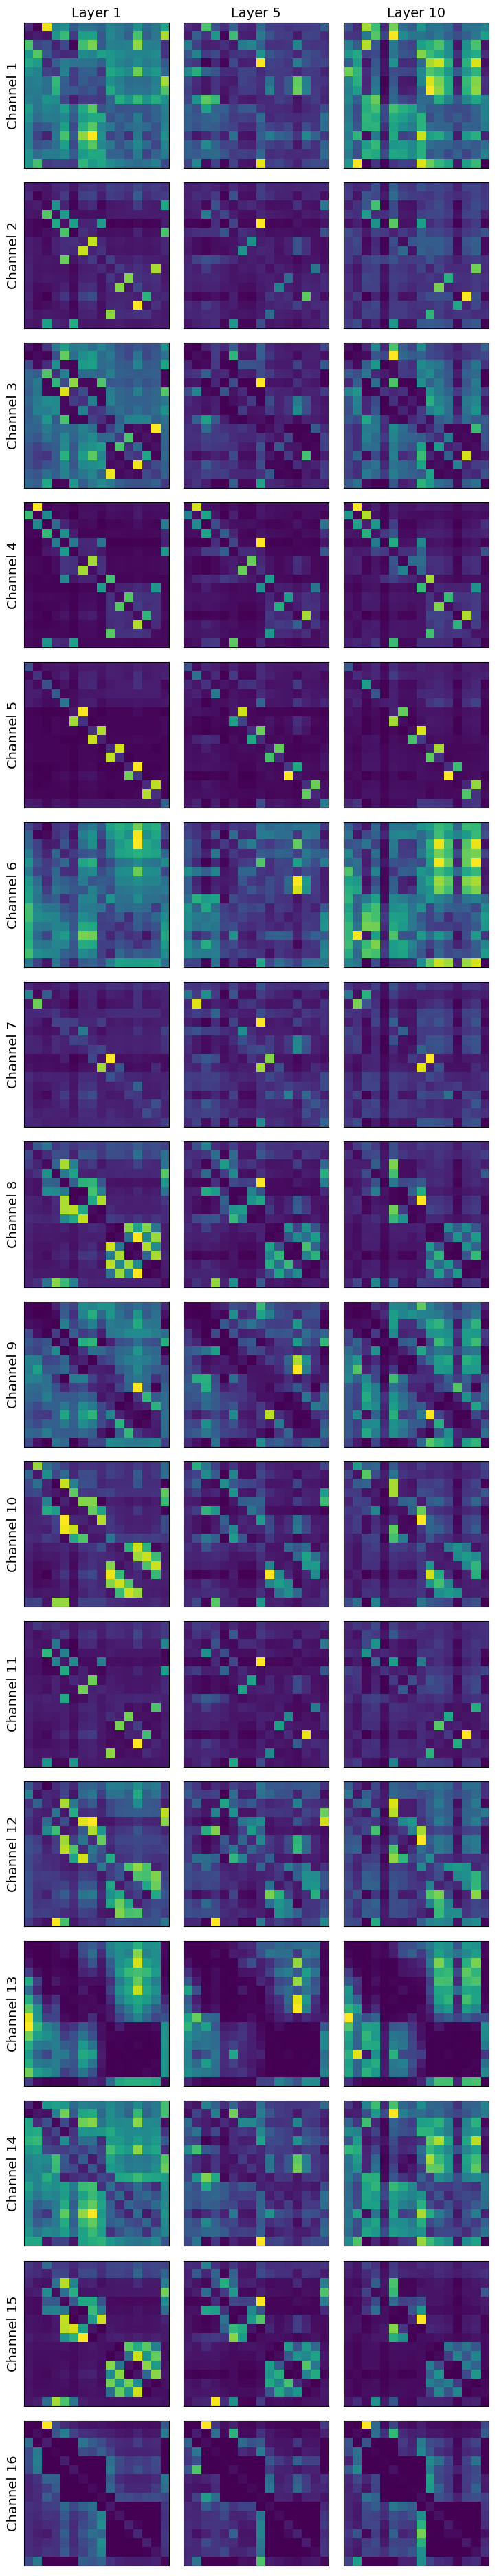

In [9]:
nb_channels = 16
channel_slice = range(16)
# channel_slice = range(26,30)
# channel_slice = range(44,48)
# channel_slice = range(53,57)
# channel_slice = range(57,61)
plt.figure(figsize=(12,12*int(nb_channels/4)))
for rk, layer_idx in enumerate([0,4,9]):
    for channel_idx in channel_slice:
        loc_scores = all_scores[layer_idx][batch_idx][mask]
        num_nodes = int(np.sqrt(loc_scores.shape[0]))
        loc_scores = loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:]))
        plt.subplot(nb_channels,3,channel_idx*3 + rk + 1)
        plt.imshow(loc_scores[:,:,head_idx,channel_idx].numpy())
        plt.xticks([])
        plt.yticks([])
        if rk==0:
            plt.ylabel(f'Channel {channel_idx + 1}', fontsize=14)
        if channel_idx==0:
            plt.title(f'Layer {layer_idx+1}', fontsize=14)
plt.subplots_adjust(wspace=-.5, hspace=.1)
plt.show()

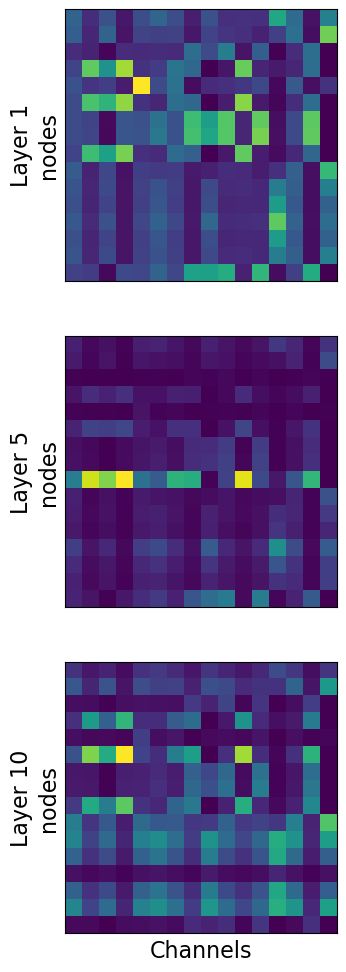

In [7]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_scores[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    # main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

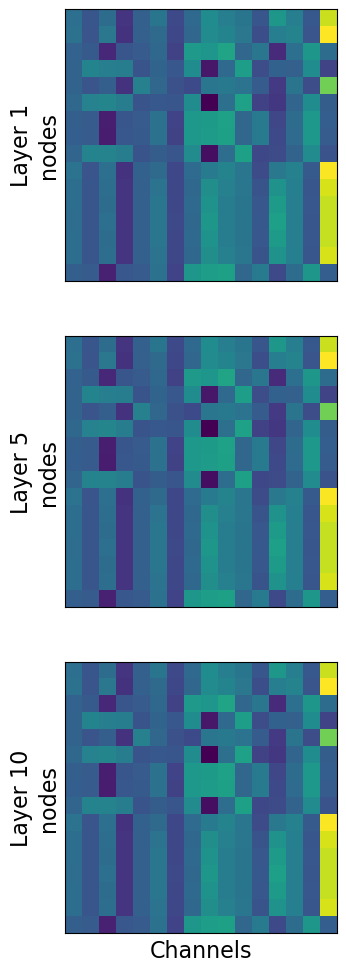

In [8]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_E[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy() - batch.ptr[batch_idx].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    #main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

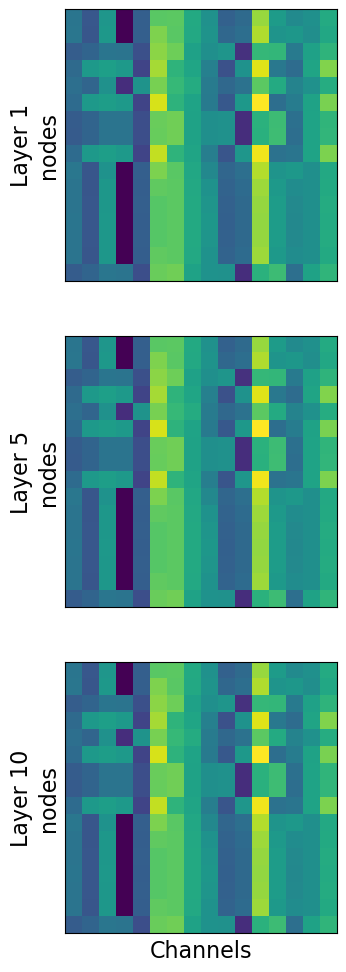

In [9]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_Ev[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy() - batch.ptr[batch_idx].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    #main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

In [6]:
from torch_geometric.utils import to_dense_adj
import networkx as nx
data = torch.load('/home/ejehanno/repos/ZINC/subset/processed/test.pt')[0]
#adj_matrix = to_dense_adj(data.edge_index[]).numpy()

In [11]:
small_mol_first_elem_idxs, small_mol_last_elem_idxs

(tensor([    0,   272,  1662,  2466,  9216, 15090, 17434, 20092, 23676, 27614,
         28808, 32016, 33154, 33426, 36922, 37256, 38030, 44180, 45544, 46542,
         46800, 46908]),
 tensor([   34,   308,  1696,  2498,  9250, 15122, 17466, 20124, 23710, 27648,
         28840, 32050, 33188, 33460, 36956, 37290, 38064, 44210, 45578, 46574,
         46834, 46942]))

In [14]:
idxs_0[:10]

tensor([  0,  34,  82, 134, 178, 222, 272, 308, 356, 396])

In [23]:
len(np.unique(data.edge_index[0,idxs_0[run]:idxs_0[run+1]]))

23

In [35]:
data

Data(x=[23117, 1], edge_index=[2, 49720], edge_attr=[49720], y=[1000])

In [25]:
additiv = 0
for run in range(7):
    additiv += len(np.unique(data.edge_index[0,idxs_0[run]:idxs_0[run+1]]))
    print(run, len(np.unique(data.edge_index[0,idxs_0[run]:idxs_0[run+1]])), additiv)

0 16 16
1 23 39
2 24 63
3 22 85
4 20 105
5 23 128
6 16 144


In [28]:
atoms_id = list(data.x[128:144].numpy().reshape(-1))
mapping = {
    0: 'C',
1: 'O',
2: 'N',
3: 'F',
4: 'C H1',
5: 'S',
6: 'Cl',
7: 'O -',
8: 'N H1 +',
9: 'Br',
10: 'N H3 +',
11: 'N H2 +',
12: 'N +',
13: 'N -',
14: 'S -',
15: 'I'}
atoms_names = list(map(lambda x: mapping[x], atoms_id))

In [30]:
np.unique(atoms_names, return_counts=True)

(array(['C', 'C H1', 'I', 'N', 'S'], dtype='<U4'), array([9, 1, 1, 4, 1]))

In [31]:
atoms_names

['I',
 'C',
 'C H1',
 'C',
 'N',
 'C',
 'N',
 'N',
 'C',
 'C',
 'C',
 'C',
 'N',
 'C',
 'C',
 'S']

C9(C H1)IN4S

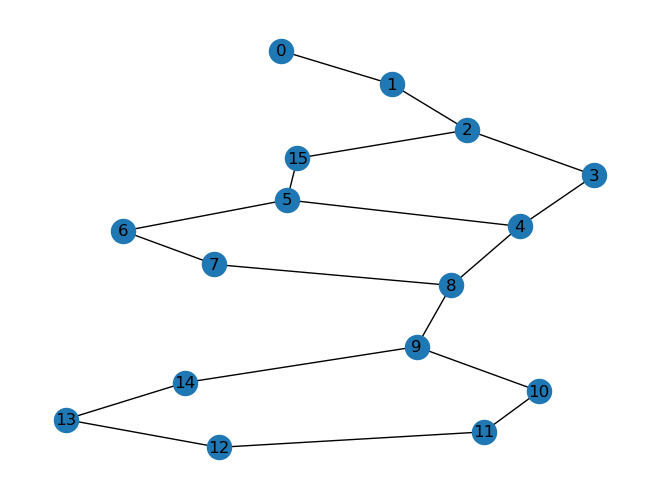

In [10]:
idxs_0 = torch.where(data.edge_index[0]==0)[0]
small_mol_idxs = torch.where(data.edge_index[0,idxs_0-1]==15)[0]
small_mol_first_elem_idxs = idxs_0[small_mol_idxs-1]
small_mol_last_elem_idxs = idxs_0[small_mol_idxs]
# for beg, end in zip(small_mol_first_elem_idxs,small_mol_last_elem_idxs):
#     adj_matrix = to_dense_adj(data.edge_index[:,beg:end])
#     plt.figure()
#     #plt.imshow(adj_matrix[0])
#     graph = nx.from_numpy_array(adj_matrix[0].numpy())
#     nx.draw(graph, with_labels=True)
#     plt.show()
adj_matrix = to_dense_adj(data.edge_index[:,small_mol_first_elem_idxs[1]:small_mol_last_elem_idxs[1]])
graph = nx.from_numpy_array(adj_matrix[0].numpy())
nx.draw(graph, with_labels=True)

In [16]:
from torch_geometric.utils import to_dense_adj
import networkx as nx
#edge_index, _ = add_self_loops(batch.edge_index)
adj_matrix = to_dense_adj(batch.edge_index, batch.batch)

In [10]:
true_adj = adj_matrix[batch_idx][mask]
num_nodes = int(np.sqrt(true_adj.shape[0]))
true_adj = true_adj.reshape(num_nodes,num_nodes)
del_edge = {}
#     3:[15,5],
#     2:[5,4],
#     15:[4],
#     4:[7,8],
#     5:[6,8],
#     6:[7],
#     9:[11,12,13],
#     10:[12,13,14],
#     11:[13,14],
#     12:[14],
# }
for k in del_edge.keys():
    for v in del_edge[k]:
        true_adj[k,v]=0
        true_adj[v,k]=0
# Extend graph with 2 nodes unrelated that will help standardize colors later
ext_adj = np.zeros((num_nodes+2,num_nodes+2))
ext_adj[:num_nodes,:num_nodes] = true_adj.numpy()
ext_adj[8,num_nodes]=1
ext_adj[9,num_nodes+1]=1
graph = nx.from_numpy_array(ext_adj)

# graph = nx.from_numpy_array(true_adj.numpy())

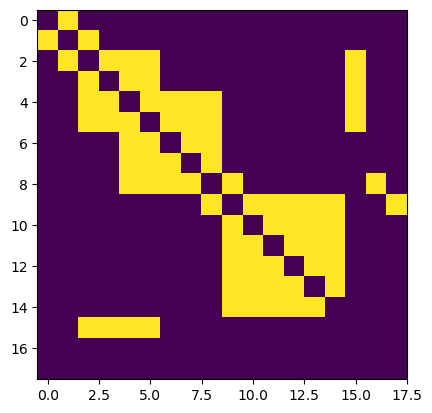

In [11]:
plt.imshow(ext_adj)

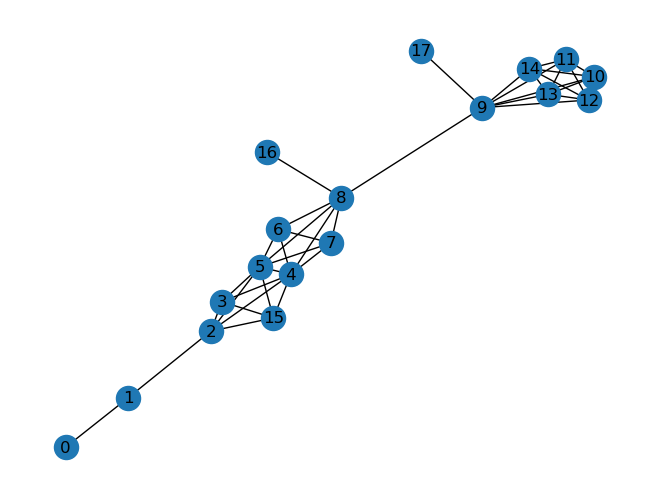

In [12]:
nx.draw(graph, with_labels=True)

In [20]:
def manual_reshape(pos):
    pos[0]=np.array([0,0])
    pos[1]=np.array([1,0])
    pos[2]=np.array([2,0])
    pos[3]=np.array([2.6,-.77])
    pos[4]=np.array([3.5,-.5])
    pos[5]=np.array([3.5,.5])
    pos[6]=np.array([4.4,-.77])
    pos[7]=np.array([4.4,.77])
    pos[8]=np.array([5,0])
    pos[9]=np.array([6,0])
    pos[10]=np.array([6.5,-.77])
    pos[11]=np.array([7.5,-.77])
    pos[12]=np.array([8,0])
    pos[13]=np.array([7.5,.77])
    pos[14]=np.array([6.5,.77])
    pos[15]=np.array([2.6,.77])
    pos[16]=np.array([5,1])
    pos[17]=np.array([6,-1])
    return pos

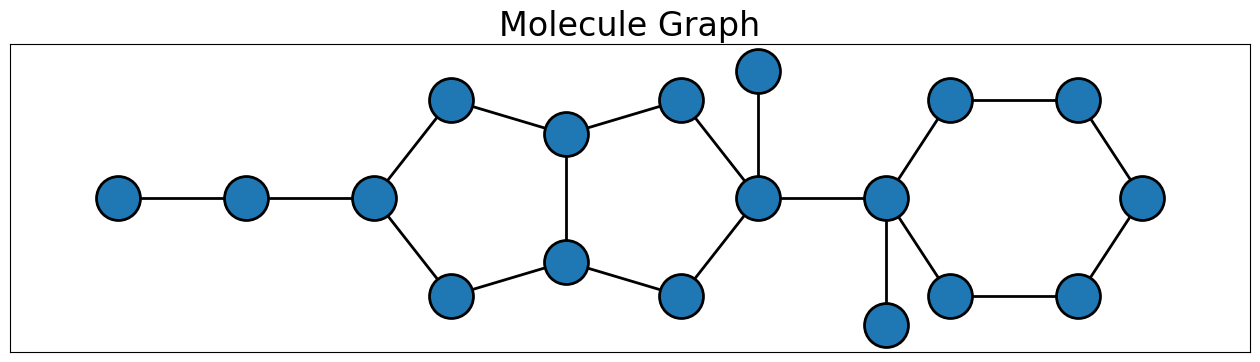

In [21]:
pos = nx.layout.spectral_layout(graph, center=(0,0))
pos = nx.spring_layout(graph, pos=pos, iterations=50)
pos = manual_reshape(pos)
plt.figure(figsize=(16,4));
plt.title('Molecule Graph', fontsize=24)
nx.draw_networkx_nodes(graph, pos, #node_color=colors, alpha=transparency,
                    linewidths=2, node_size=1000, edgecolors='black',
                    cmap='viridis');
#graph.add_edge(3,5)
nx.draw_networkx_edges(graph, pos, width=2);

In [51]:
true_adj = adj_matrix[batch_idx][mask]
num_nodes = int(np.sqrt(true_adj.shape[0]))
true_adj = true_adj.reshape(num_nodes,num_nodes)
del_edge = {
    3:[15,5],
    2:[5,4],
    15:[4],
    4:[7,6],
    5:[7,8],
    6:[8],
    9:[11,12,13],
    10:[12,13,14],
    11:[13,14],
    12:[14],
}
for k in del_edge.keys():
    for v in del_edge[k]:
        true_adj[k,v]=0
        true_adj[v,k]=0
# Extend graph with 2 nodes unrelated that will help standardize colors later
ext_adj = np.zeros((num_nodes+2,num_nodes+2))
ext_adj[:num_nodes,:num_nodes] = true_adj.numpy()
ext_adj[8,num_nodes]=1
ext_adj[9,num_nodes+1]=1
graph = nx.from_numpy_array(ext_adj)
nx.draw(graph, with_labels=True)
# graph = nx.from_numpy_array(true_adj.numpy())

IndexError: index 6 is out of bounds for dimension 0 with size 1

{0: Text(3.7, 4.6, 'I'),
 1: Text(4.1, 5.9, 'C'),
 2: Text(4.5, 5.0, 'C H1'),
 3: Text(4.8, 4.36, 'C'),
 4: Text(4.8, 1.9, 'N'),
 5: Text(4.5, 1.23, 'C'),
 6: Text(4.5, -1.23, 'N'),
 7: Text(4.8, -1.9, 'N'),
 8: Text(5, 0, 'C'),
 9: Text(5.4, 0.0, 'C'),
 10: Text(5.6, -1.9, 'C'),
 11: Text(5.9, -1.9, 'C'),
 12: Text(6.1, 0.0, 'N'),
 13: Text(5.9, 1.9, 'C'),
 14: Text(5.6, 1.9, 'C'),
 15: Text(4.3, 3.1, 'S'),
 16: Text(3.2, 5.6, ''),
 17: Text(6.6, -1.9, '')}

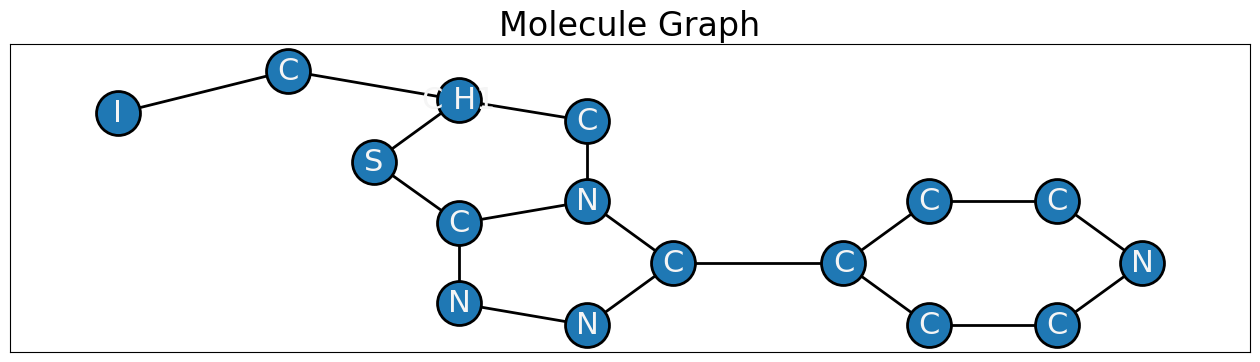

In [33]:
def manual_reshape(pos):
    pos[0]=np.array([3.7,4.6])
    pos[1]=np.array([4.1,5.9])
    pos[2]=np.array([4.5,5.])
    pos[3]=np.array([4.8,4.36])
    pos[15]=np.array([4.3,3.1])
    pos[6]=np.array([4.5,-1.23])
    pos[5]=np.array([4.5,1.23])
    pos[7]=np.array([4.8,-1.9])
    pos[4]=np.array([4.8,1.9])
    pos[8]=np.array([5,0])
    pos[9]=np.array([5.4,0])
    pos[10]=np.array([5.6,-1.9])
    pos[11]=np.array([5.9,-1.9])
    pos[12]=np.array([6.1,0])
    pos[13]=np.array([5.9,1.9])
    pos[14]=np.array([5.6,1.9])
    pos[16]=np.array([3.2,5.6])
    pos[17]=np.array([6.6,-1.9])
    return pos

pos = nx.layout.spectral_layout(graph, center=(0,0))
pos = nx.spring_layout(graph, pos=pos, iterations=50)
pos = manual_reshape(pos)
#plt.figure(figsize=(16,4));
fig, ax = plt.subplots(figsize=(16,4))
plt.title('Molecule Graph', fontsize=24)
nx.draw_networkx_nodes(graph, pos, #node_color=colors, alpha=transparency,
                    linewidths=2, node_size=1000, edgecolors='black',
                    cmap='viridis', ax=ax);
#graph.add_edge(3,5)
nx.draw_networkx_edges(graph, pos, width=2, ax=ax);
labels = {0:'I',
 1:'C',
 2:'C H1',
 3:'C',
 4:'N',
 5:'C',
 6:'N',
 7:'N',
 8:'C',
 9:'C',
 10:'C',
 11:'C',
 12:'N',
 13:'C',
 14:'C',
 15:'S',
 16:'',
 17:''}
nx.draw_networkx_labels(graph, pos, labels, font_size=22, font_color="whitesmoke")
#ax.set_xlim(3.5,6.5)

In [34]:
data.y[6]

tensor(-0.5774)

{0: Text(589, -509, 'I'),
 1: Text(661, -531, 'C'),
 2: Text(716, -479, 'C H1'),
 3: Text(791, -495, 'C'),
 4: Text(829, -426, 'N'),
 5: Text(777, -371, 'C'),
 6: Text(817, -303, 'N'),
 7: Text(891, -320, 'N'),
 8: Text(901, -397, 'C'),
 9: Text(968, -434, 'C'),
 10: Text(1034, -396, 'C'),
 11: Text(1100, -436, 'C'),
 12: Text(1100, -512, 'N'),
 13: Text(1036, -549, 'C'),
 14: Text(969, -511, 'C'),
 15: Text(708, -401, 'S'),
 16: Text(572, -195, ''),
 17: Text(1127, -688, '')}

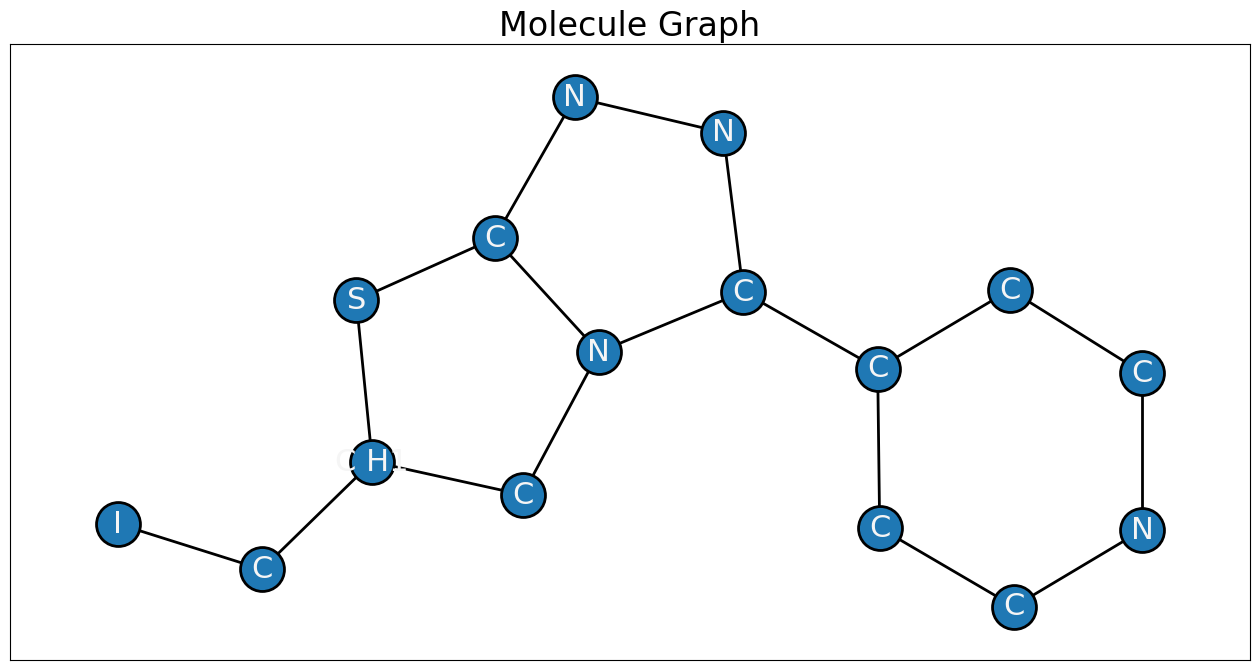

In [49]:
def manual_reshape(pos):
    pos[0]=np.array([589,-509])
    pos[1]=np.array([661,-531])
    pos[2]=np.array([716,-479])
    pos[3]=np.array([791,-495])
    pos[15]=np.array([708,-401])
    pos[6]=np.array([817,-303])
    pos[5]=np.array([777,-371])
    pos[7]=np.array([891,-320])
    pos[4]=np.array([829,-426])
    pos[8]=np.array([901,-397])
    pos[9]=np.array([968,-434])
    pos[10]=np.array([1034,-396])
    pos[11]=np.array([1100,-436])
    pos[12]=np.array([1100,-512])
    pos[13]=np.array([1036,-549])
    pos[14]=np.array([969,-511])
    pos[16]=np.array([572,-195])
    pos[17]=np.array([1127,-688])
    return pos

pos = nx.layout.spectral_layout(graph, center=(0,0))
pos = nx.spring_layout(graph, pos=pos, iterations=50)
pos = manual_reshape(pos)
#plt.figure(figsize=(16,4));
fig, ax = plt.subplots(figsize=(16,8))
plt.title('Molecule Graph', fontsize=24)
nx.draw_networkx_nodes(graph, pos, #node_color=colors, alpha=transparency,
                    linewidths=2, node_size=1000, edgecolors='black',
                    cmap='viridis', ax=ax);
#graph.add_edge(3,5)
nx.draw_networkx_edges(graph, pos, width=2, ax=ax);
labels = {0:'I', 1:'C', 2:'C H1', 3:'C', 4:'N', 5:'C', 6:'N', 7:'N', 8:'C', 9:'C', 10:'C',
         11:'C', 12:'N', 13:'C', 14:'C', 15:'S', 16:'', 17:''}
nx.draw_networkx_labels(graph, pos, labels, font_size=22, font_color="whitesmoke")
#ax.set_xlim(3.5,6.5)

In [50]:
pos = nx.layout.spectral_layout(graph)
pos = nx.spring_layout(graph, pos=pos, iterations=50)
pos = manual_reshape(pos)

layer_idx = 0
node_idx = 7 # 2, 6, 9
loc_scores = all_scores[layer_idx][batch_idx][mask]
loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()

main = plt.figure(figsize=(12,12));
ax = main.add_subplot(1,1,1)
ax.imshow(loc_scores)
plt.xlabel('Channels')
plt.ylabel('Neighbors')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_ylabel(f'Neighbors', fontsize=28)
ax.set_xlabel('Channels', fontsize=28)
# cmap=cm.get_cmap('viridis')
# norm=Normalize(loc_scores.min(),loc_scores.max())
# im = cm.ScalarMappable(norm=norm)
transparency = np.ones(num_nodes+2)
transparency[node_idx] = 1
transparency[num_nodes:] = 0.
contours = ['black']*(num_nodes+2)
contours[node_idx] = 'red'

chnls = nb_channels
nb_col = int(np.sqrt(chnls))
nb_lin = int(np.ceil(float(chnls)/nb_col))
fig = plt.figure(frameon=False, figsize=(4*nb_col,1.6*nb_lin))
axes = fig.subplots(nrows=nb_lin, ncols=nb_col)
plt.suptitle(f'Layer {layer_idx+1} Attention Scores\nNeighbors scores of the red circled node', fontsize=16, y=1.02)
for channel_idx in range(chnls):
    colors = list(loc_scores[:,channel_idx]) + [loc_scores.min(), loc_scores.max()]
    #colors = list(loc_scores[:,channel_idx]) + [loc_scores.mean(), loc_scores.mean()]
    # Pas ouf de normalizer tout, on a des points jaunes partout et je sais pas si ça veut dire qqch
    #~~~~~~~~~~~~
    # Draw graph
    #~~~~~~~~~~~~
    #fig.title('Molecule Graph', fontsize=24)
    #ax = fig.add_axes([0, 0, 1, 1])
    ax = axes[channel_idx//nb_col, channel_idx%nb_col]
    ax.set_title(f'Channel {channel_idx}', fontsize=10)
    ax.axis('off')
    
    node_size = [150]*num_nodes+[0,0]
    nx.draw_networkx_nodes(graph, pos, node_color=colors, alpha=transparency,
                           linewidths=1.5, edgecolors=contours,
                           cmap='viridis', node_size=node_size, ax=ax) # node_size=1000
    # fig.colorbar(im,ax=ax)
    width=[0 if v+1>num_nodes else 2 for u,v in graph.edges()]
    nx.draw_networkx_edges(graph, pos, width=width, ax=ax)
fig.tight_layout()
plt.show()

NameError: name 'num_nodes' is not defined

<Figure size 1200x1200 with 0 Axes>

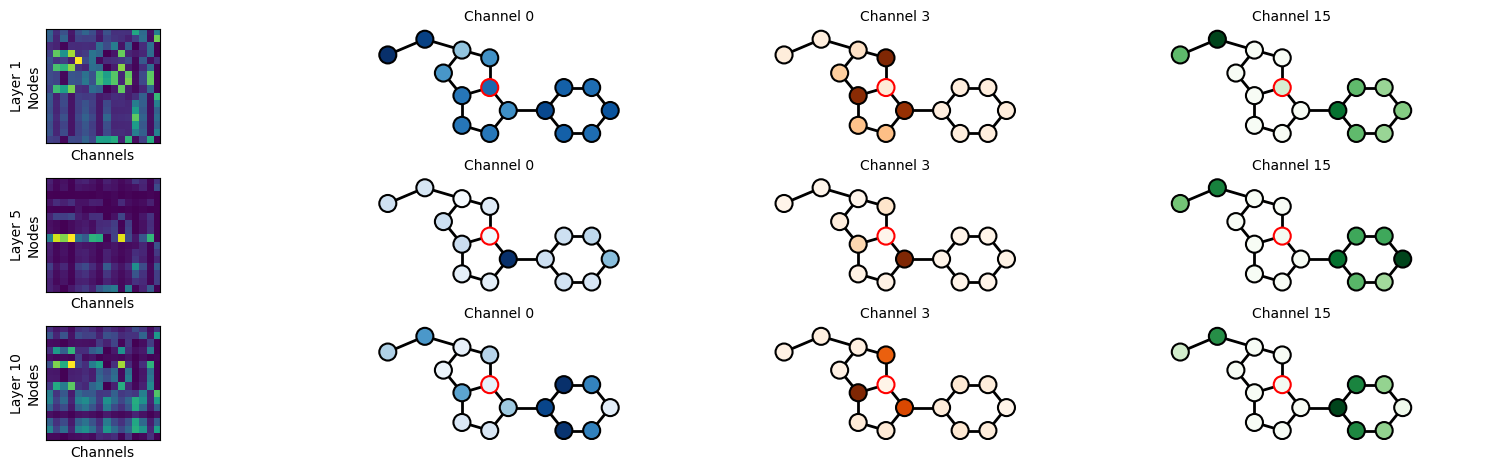

In [98]:
pos = nx.layout.spectral_layout(graph)
pos = nx.spring_layout(graph, pos=pos, iterations=50)
pos = manual_reshape(pos)

main = plt.figure(figsize=(12,12));
node_idx = 4 # 2, 6, 9, 7
layers_of_int = [0,4,9]
nb_lin = len(layers_of_int)
chnls = [0,3,15] #range(3) #range(6,9)
nb_col = len(chnls) + 1
colors = ['Blues','Oranges','Greens']
fig = plt.figure(frameon=False, figsize=(4*nb_col,1.6*nb_lin))
axes = fig.subplots(nrows=nb_lin, ncols=nb_col)
#plt.suptitle(f'Layer {layer_idx+1} Attention Scores\nNeighbors scores of the red circled node', fontsize=16, y=1.02)
for layer_rank, layer_idx in enumerate(layers_of_int):
    loc_scores = all_scores[layer_idx][batch_idx][mask]
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()

    # loc_scores = all_scores[layer_idx][batch_idx][mask]
    # num_nodes = int(np.sqrt(loc_scores.shape[0]))
    # loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    # loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()

    ax = axes[layer_rank, 0]
    ax.imshow(loc_scores)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nNodes', fontsize=10)
    ax.set_xlabel('Channels', fontsize=10)

    contours = ['black']*(num_nodes+2)
    contours[node_idx] = 'red'

    for chnl_rk, channel_idx in enumerate(chnls):
        values = np.zeros(num_nodes+2)
        color = colors[chnl_rk]
        values[:-2] = list(loc_scores[:,channel_idx])
        #values /= 2.
        #values /= values.max()
        # colors = list(loc_scores[:,channel_idx]) + [loc_scores.min(), loc_scores.max()]
        # colors = list(loc_scores[:,channel_idx]) + [loc_scores.mean(), loc_scores.mean()]
        # Pas ouf de normalizer tout, on a des points jaunes partout et je sais pas si ça veut dire qqch
        #~~~~~~~~~~~~
        # Draw graph
        #~~~~~~~~~~~~
        #fig.title('Molecule Graph', fontsize=24)
        #ax = fig.add_axes([0, 0, 1, 1])
        ax = axes[layer_rank, chnl_rk+1]
        ax.set_title(f'Channel {channel_idx}', fontsize=10)
        ax.axis('off')
        
        node_size = [150]*num_nodes+[0,0]
        nx.draw_networkx_nodes(graph, pos, alpha=1, node_color=values,
                            linewidths=1.5, edgecolors=contours, cmap=color,
                            node_size=node_size, ax=ax) # node_size=1000
        # fig.colorbar(im,ax=ax)
        width=[0 if v+1>num_nodes else 2 for u,v in graph.edges()]
        nx.draw_networkx_edges(graph, pos, width=width, ax=ax)
fig.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

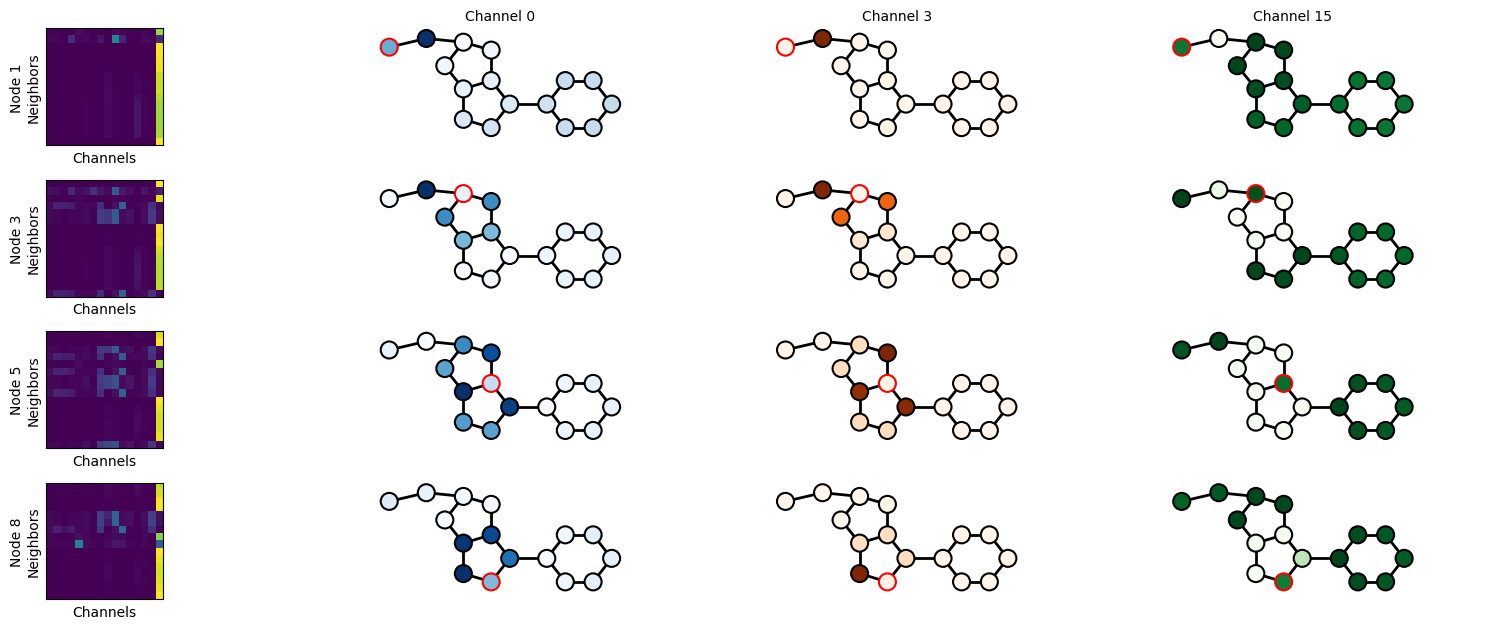

In [95]:
pos = nx.layout.spectral_layout(graph)
pos = nx.spring_layout(graph, pos=pos, iterations=50)
pos = manual_reshape(pos)

main = plt.figure(figsize=(12,12));
#node_idx = 4 # 2, 6, 9, 7
nodes_of_int = [0,2,4,7]
nb_lin = len(nodes_of_int)
#layers_of_int = [0] #[0,4,9]
#nb_lin = len(layers_of_int)
layer_idx = 9
chnls = [0,3,15] #range(3) #range(6,9)
nb_col = len(chnls) + 1
colors = ['Blues','Oranges','Greens']
fig = plt.figure(frameon=False, figsize=(4*nb_col,1.6*nb_lin))
axes = fig.subplots(nrows=nb_lin, ncols=nb_col)
#plt.suptitle(f'Layer {layer_idx+1} Attention Scores\nNeighbors scores of the red circled node', fontsize=16, y=1.02)
for node_rank, node_idx in enumerate(nodes_of_int):
    loc_scores = all_E[layer_idx][batch_idx][mask]
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = torch.softmax(loc_scores[node_idx,:,head_idx,:], dim=1).numpy()
    #loc_scores /= np.max(loc_scores, axis=0).reshape(1,-1)

    ax = axes[node_rank, 0]
    ax.imshow(loc_scores)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Node {node_idx+1}\nNeighbors', fontsize=10)
    ax.set_xlabel('Channels', fontsize=10)

    contours = ['black']*(num_nodes+2)
    contours[node_idx] = 'red'

    for chnl_rk, channel_idx in enumerate(chnls):
        values = np.zeros(num_nodes+2)
        color = colors[chnl_rk]
        values[:-2] = list(loc_scores[:,channel_idx])
        values[-2:] = [loc_scores[:,channel_idx].mean()] * 2
        #values /= 2.
        #values /= values.max()
        # colors = list(loc_scores[:,channel_idx]) + [loc_scores.min(), loc_scores.max()]
        # colors = list(loc_scores[:,channel_idx]) + [loc_scores.mean(), loc_scores.mean()]
        # Pas ouf de normalizer tout, on a des points jaunes partout et je sais pas si ça veut dire qqch
        #~~~~~~~~~~~~
        # Draw graph
        #~~~~~~~~~~~~
        #fig.title('Molecule Graph', fontsize=24)
        #ax = fig.add_axes([0, 0, 1, 1])
        ax = axes[node_rank, chnl_rk+1]
        if node_rank==0:
            ax.set_title(f'Channel {channel_idx}', fontsize=10)
        ax.axis('off')
        
        node_size = [150]*num_nodes+[0,0]
        nx.draw_networkx_nodes(graph, pos, alpha=1, node_color=values,
                            linewidths=1.5, edgecolors=contours, cmap=color,
                            node_size=node_size, ax=ax) # node_size=1000
        # fig.colorbar(im,ax=ax)
        width=[0 if v+1>num_nodes else 2 for u,v in graph.edges()]
        nx.draw_networkx_edges(graph, pos, width=width, ax=ax)
fig.tight_layout()
plt.show()

---
---
---
## Showing RWSE

In [14]:
from copy import deepcopy
batch_cp = deepcopy(batch)
delattr(batch_cp,'saved_RWSE_batch')

In [41]:
idxs = list(range(batch_cp.ptr[batch_idx],batch_cp.ptr[batch_idx+1]))
edge_idxs = []
for nd_idx in idxs:
    edge_idxs.append((batch_cp.edge_index[0,:]==nd_idx).nonzero(as_tuple=True)[0])
edge_idxs = torch.cat(edge_idxs)
edge_rwse = batch.saved_RWSE_batch.edge_attr[edge_idxs,:]

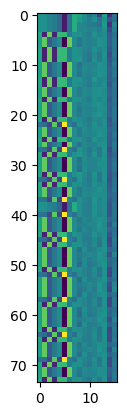

In [43]:
plt.imshow(edge_rwse.numpy())

---
---
---

## Performance against nb heads

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

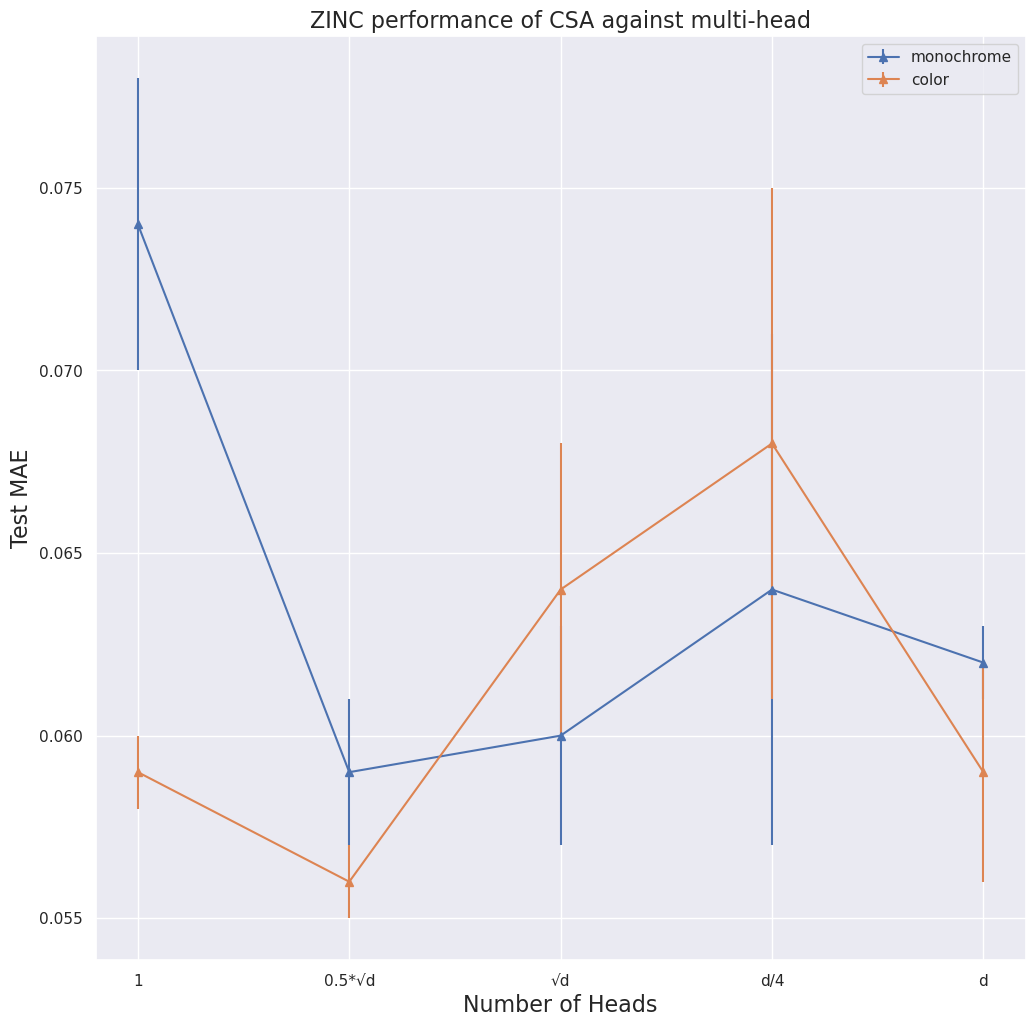

In [4]:
plt.figure(figsize=(12,12));
# mean_mono = [0.147, 0.1175, 0.123, 0.1143, 0.118]
# std_mono = [0.003, 0.0004, 0.001, 0.0002, 0.005]
mean_mono = [0.074, 0.059, 0.060, 0.064, 0.062]
std_mono = [0.004, 0.002, 0.003, 0.007, 0.001]
#ax.scatter([1,2,3,4,5], [0.147, 0.1175, 0.123, 0.1143, 0.118], label='monochrome', marker='.')
plt.errorbar([1,2,3,4,5], mean_mono, std_mono, linestyle='-', marker='^', label='monochrome')
# mean_color = [0.121, 0.117, 0.112, 0.116, 0.117]
# std_color = [0.001, 0.004, 0.001, 0.003, 0.004]
mean_color = [0.059, 0.056, 0.064, 0.068, 0.059]
std_color = [0.001, 0.001, 0.004, 0.007, 0.003]
#ax.scatter([1,2,3,4,5],[0.121,0.117,0.112,0.116,0.117], label='color', marker='.')
plt.errorbar([1,2,3,4,5], mean_color, std_color, linestyle='-', marker='^', label='color')
# plt.xlabel('Number of Heads')
# plt.ylabel('Test MAE')
#ax.get_yaxis().set_ticks([])
plt.ylabel(f'Test MAE', fontsize=16)
plt.xlabel('Number of Heads', fontsize=16)
#plt.title('PCQM4Mv2-subset performance of CSA against multi-head', fontsize=16)
plt.title('ZINC performance of CSA against multi-head', fontsize=16)
plt.legend()
plt.xticks([1,2,3,4,5], ['1','0.5*√d', '√d', 'd/4', 'd'])
plt.show()